## Assignment 2 - Logistic Regression
SPPH 500 - Ly Trinh

### Question 1
On this assignment, we will study the relationship between education and the use of contraceptives in Fiji, in the mid 1970s.  The dataset ContraceptiveUseIndicators.txt is an 
adaptation of a dataset use by Little (1978, reference given below).  The data consists of observations on 1607 married and fecund women interviewed in the Fiji Fertility Survey of 1975. 
 
The main research question of interest is to examine the relationship between education and contraceptive use in Fiji in the 1970s, while controlling for other confounding variables.  Below is 
a description of the variables contained in the data set.  Note: Age is given as both numeric and a categorical variable.  For the assignment, we will work with the categorized ages. 
 
Age = The numeric age 
AgeCat = Categorized ages: A = “<25”, B=”25-29”, C=”30-39”, D=”40-49” \
Education = Education categorized as: 0 = “low”, 1 = “high” \
WantsMore = An indicator if the women wants to have more children: 0 = “no”, 1 = “yes” \
UseContraceptive = An indicator of contraceptive use: 0 = “no”, 1 = “yes” \
     ** You should make sure to convert Education, WantsMore to factors in R 
 
Reference: Little, R. J. A. (1978). Generalized Linear Models for Cross-Classified Data from the WFS. World Fertility Survey Technical Bulletins, Number 5. 
 
In Question 1, we will work through an analysis of this data.  In Question 2, we will write up the findings.  You do NOT need to include any of the R code (or other software) used to produce the 
output.  You should include any relevant plots/summaries you make reference to. 

In [68]:
library(tidyverse)
library(GridExtra)
library(epiR)

Loading required package: survival
Package epiR 2.0.41 is loaded
Type help(epi.about) for summary information
Type browseVignettes(package = 'epiR') to learn how to use epiR for applied epidemiological analyses




In [46]:
# load data
ContraData <- read.delim('./ContraceptiveUseIndicators.txt', header=T, sep="")
head(ContraData)

Age,AgeCat,Education,WantsMore,UseContraceptive
21,A,0,1,0
18,A,0,1,0
19,A,0,1,0
22,A,0,1,0
17,A,0,1,0
20,A,0,1,0


#### (a) Univariate Summaries: 
Examine each variable on its own.  You Do Not need to include this with your submitted assignment (this is to help you get a feel for the data). 

In [47]:
summary(ContraData)

      Age        AgeCat    Education        WantsMore      UseContraceptive
 Min.   :17.00   A:397   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:25.00   B:404   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :30.00   C:612   Median :1.0000   Median :1.0000   Median :0.0000  
 Mean   :30.45   D:194   Mean   :0.6185   Mean   :0.6049   Mean   :0.3155  
 3rd Qu.:36.00           3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :47.00           Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  

In [49]:
# change all categorical variables into factors
ContraData <- ContraData %>%
    mutate(across(!starts_with("Age"), as.factor))
summary(ContraData)

      Age        AgeCat  Education WantsMore UseContraceptive
 Min.   :17.00   A:397   0:613     0:635     0:1100          
 1st Qu.:25.00   B:404   1:994     1:972     1: 507          
 Median :30.00   C:612                                       
 Mean   :30.45   D:194                                       
 3rd Qu.:36.00                                               
 Max.   :47.00                                               

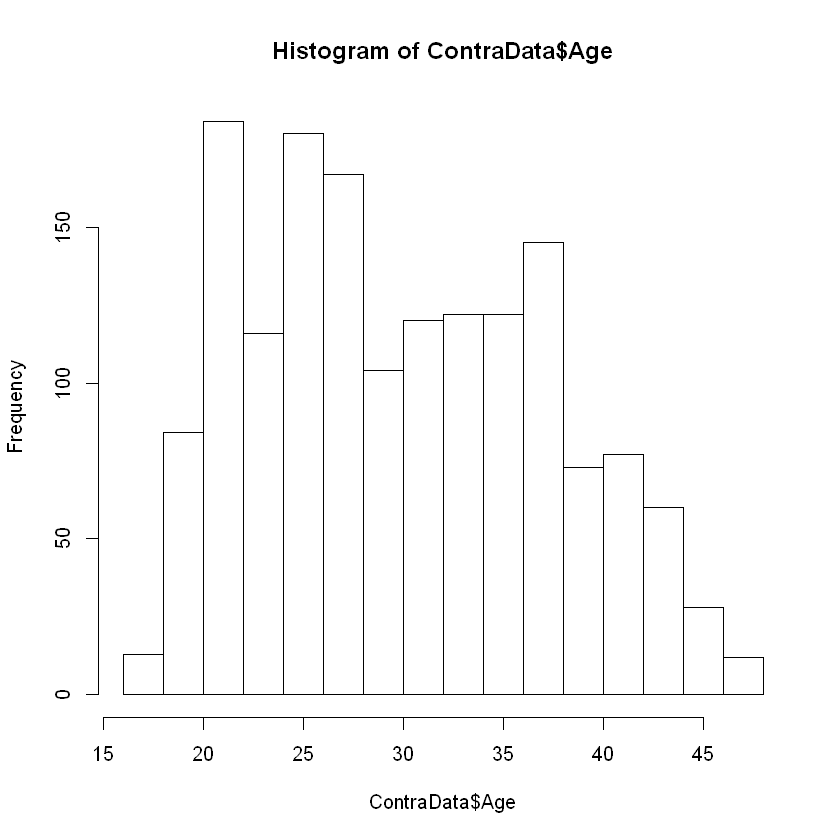

In [14]:
hist(ContraData$Age)

#### (b)  Bivariate Summaries:  
Examine the bivariate relationships between “UseContraceptive” and each of the other variables.  Also, examine the bivariate relationship between “Education” and each of the other variables.  You Do Not need to include this with your submitted assignment (this is to help you get a feel for the relationships that exist between variables, potential confounders, collinearities, as well as other significant predictors of the outcome). 

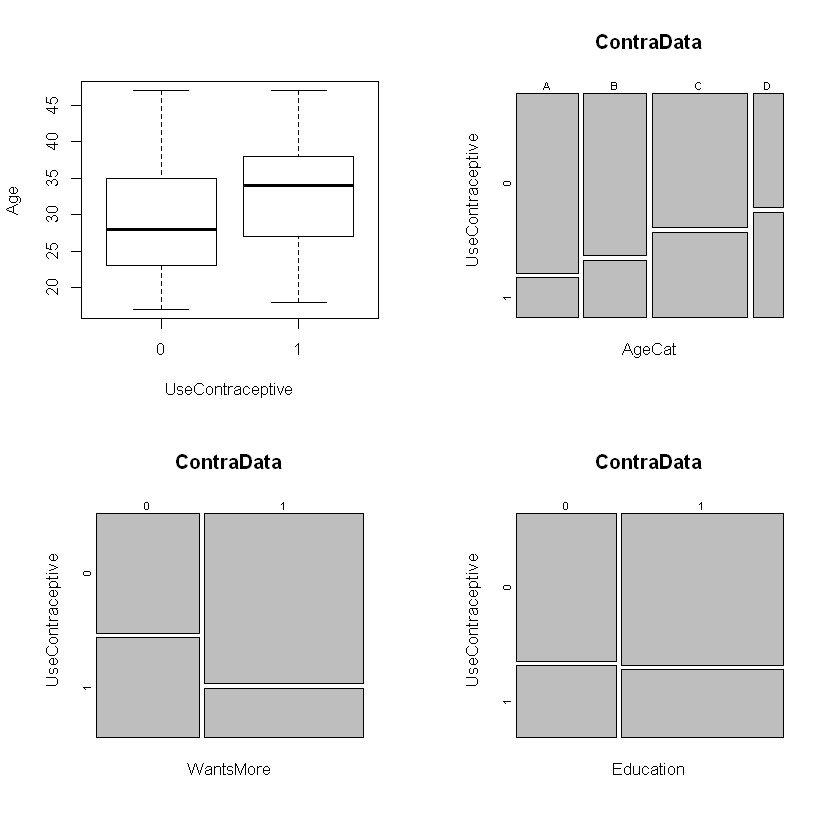

In [62]:
# plots of outcome ~ each variable
par(mfrow=c(2,2))
boxplot(Age~UseContraceptive, data=ContraData)
mosaicplot(AgeCat~UseContraceptive, data=ContraData)
mosaicplot(WantsMore~UseContraceptive, data=ContraData)
mosaicplot(Education~UseContraceptive, data=ContraData)
par(mfrow=c(1,1))

#### (c)  Bivariate Summary: 
Examine the relationship between Education and Age Category, and report some plot and/or numeric summaries that describe the relationship that exists between the two.  Make sure to comment on the direction of the association. 

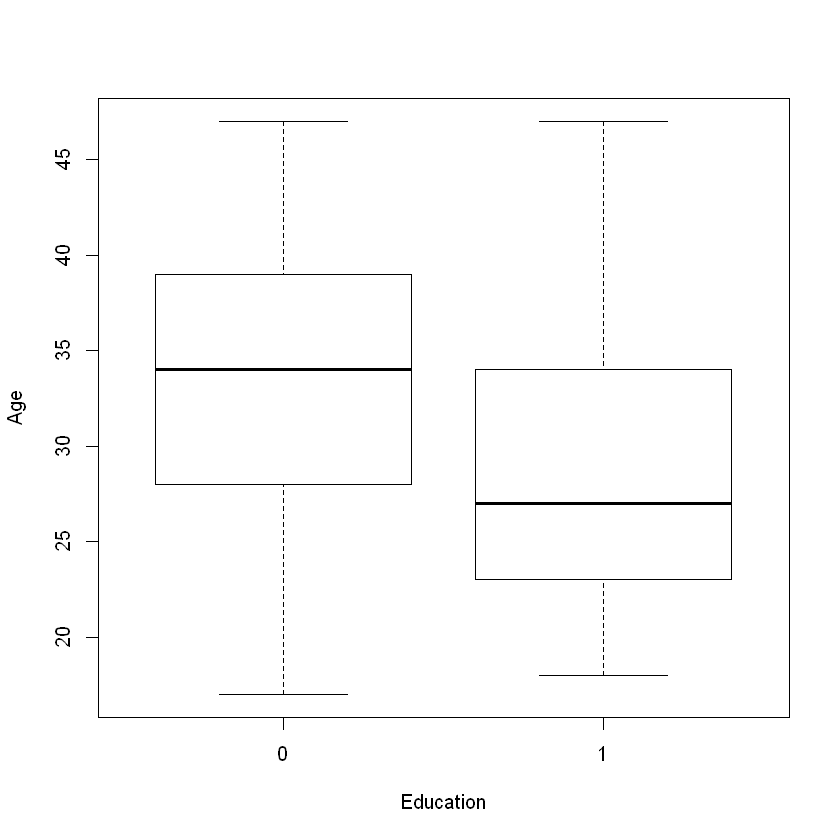

In [63]:
boxplot(Age~Education, data=ContraData)

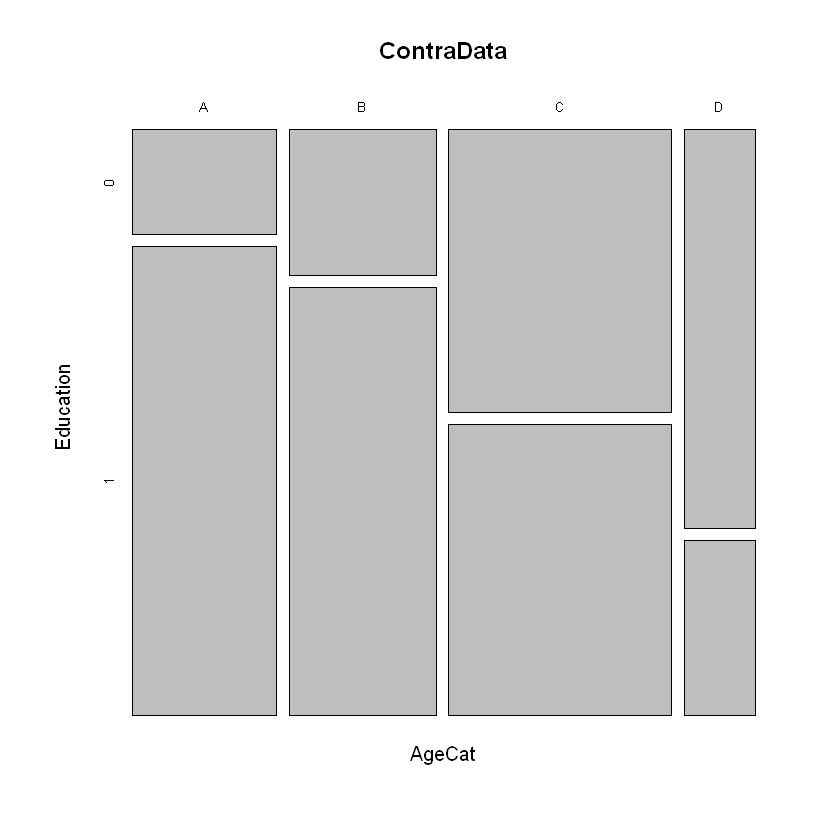

In [66]:
mosaicplot(AgeCat~Education,data=ContraData)

Older people are less likely to have high levels of education.

#### (d)  Unadjusted Odds Ratio: 
Calculate and report the unadjusted odds ratio measuring the association between Education and the Use of Contraceptives.  Do this first by producing a 2x2 table and calculating the OR directly from here.   Then, calculate the OR by fitting a simple logistic regression, and confirm that these produce the same OR. 

In [71]:
# 2x2 table, formatted for OR calculations
tab <- with(ContraData, table(Education, UseContraceptive))[2:1, 2:1]
tab

         UseContraceptive
Education   1   0
        1 306 688
        0 201 412

In [72]:
# find OR with epiR
epi.2by2(tab)

             Outcome +    Outcome -      Total        Inc risk *        Odds
Exposed +          306          688        994              30.8       0.445
Exposed -          201          412        613              32.8       0.488
Total              507         1100       1607              31.5       0.461

Point estimates and 95% CIs:
-------------------------------------------------------------------
Inc risk ratio                                 0.94 (0.81, 1.09)
Odds ratio                                     0.91 (0.73, 1.13)
Attrib risk in the exposed *                   -2.00 (-6.70, 2.69)
Attrib fraction in the exposed (%)            -6.51 (-23.35, 8.02)
Attrib risk in the population *                -1.24 (-5.60, 3.12)
Attrib fraction in the population (%)         -3.93 (-13.56, 4.88)
-------------------------------------------------------------------
Uncorrected chi2 test that OR = 1: chi2(1) = 0.706 Pr>chi2 = 0.401
Fisher exact test that OR = 1: Pr>chi2 = 0.408
 Wald confiden

In [73]:
# find OR by using logistic regression
mod1 <- glm(UseContraceptive~Education, family=binomial(link='logit'), data=ContraData)
summary(mod1)


Call:
glm(formula = UseContraceptive ~ Education, family = binomial(link = "logit"), 
    data = ContraData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8914  -0.8914  -0.8578   1.4934   1.5350  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.71772    0.08604  -8.342   <2e-16 ***
Education1  -0.09249    0.11011  -0.840    0.401    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2003.7  on 1606  degrees of freedom
Residual deviance: 2003.0  on 1605  degrees of freedom
AIC: 2007

Number of Fisher Scoring iterations: 4


In [74]:
exp(mod1$coefficients) #odds ratio is the exponentiated slope coefficient

(Intercept)  Education1 
  0.4878641   0.9116626

In [75]:
# 95% CI of coefficients
exp(confint(mod1))

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),0.4114423,0.576592
Education1,0.7350421,1.131957


#### (e)  Adjust for Age Category: 
Fit a logistic regression that relates Education to Contraceptive Use, adjusting for Age Category.  Will you include Age Category in the model?  Why or why not?  

In [79]:
mod2 <- update(mod1, ~. + AgeCat)
summary(mod2)


Call:
glm(formula = UseContraceptive ~ Education + AgeCat, family = binomial(link = "logit"), 
    data = ContraData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2313  -0.9304  -0.6474   1.3131   1.9573  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.7562     0.1660 -10.582  < 2e-16 ***
Education1    0.2999     0.1216   2.465  0.01368 *  
AgeCatB       0.4821     0.1731   2.784  0.00536 ** 
AgeCatC       1.1428     0.1595   7.165 7.77e-13 ***
AgeCatD       1.5822     0.2051   7.716 1.20e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2003.7  on 1606  degrees of freedom
Residual deviance: 1918.3  on 1602  degrees of freedom
AIC: 1928.3

Number of Fisher Scoring iterations: 4


AgeCat seems like a good variable to adjust for (statistically significant).

#### (f) Adjusted Odds Ratio: 
Using the model fit in part (e), report and interpret the adjusted OR, along with a 95% confidence interval for it.  

In [89]:
#Adjusted OR
print("Log OR:")
print(coef(mod2))
print("OR:")
print(exp(coef(mod2)))

[1] "Log OR:"
(Intercept)  Education1     AgeCatB     AgeCatC     AgeCatD 
 -1.7561590   0.2999025   0.4820754   1.1428368   1.5822236 
[1] "OR:"
(Intercept)  Education1     AgeCatB     AgeCatC     AgeCatD 
   0.172707    1.349727    1.619432    3.135651    4.865763 


In [92]:
exp(confint(mod2))

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),0.1239897,0.2377507
Education1,1.0648165,1.7157274
AgeCatB,1.1555442,2.2798258
AgeCatC,2.3036901,4.3075469
AgeCatD,3.2645685,7.2986829


#### (g)  Include Wants More?
Now, try including the variable indicating if they want more children in the model fit in part (e).  Do you think this variable should be included in the model?  Why or why not? 

In [93]:
mod3 <- update(mod2, ~. + WantsMore)
summary(mod3)


Call:
glm(formula = UseContraceptive ~ Education + AgeCat + WantsMore, 
    family = binomial(link = "logit"), data = ContraData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3429  -0.8819  -0.6129   1.1351   2.0480  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.1332     0.1871  -6.057 1.39e-09 ***
Education1    0.3250     0.1240   2.620  0.00879 ** 
AgeCatB       0.3894     0.1759   2.214  0.02681 *  
AgeCatC       0.9086     0.1646   5.519 3.40e-08 ***
AgeCatD       1.1892     0.2144   5.546 2.92e-08 ***
WantsMore1   -0.8330     0.1175  -7.091 1.33e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2003.7  on 1606  degrees of freedom
Residual deviance: 1867.8  on 1601  degrees of freedom
AIC: 1879.8

Number of Fisher Scoring iterations: 4


Yes - we should include *WantsMore*.

#### (h)  Predicted Probabilities:  
Fit a logistic regression model that includes Education, AgeCat and WantsMore to estimate contraceptive use.  Using this model, what is the estimated probability of contraceptive use for someone who is in Age Category A, wants more children and is of high education.  

In [97]:
# Fitted model name is mod3.
new = data.frame(AgeCat="A", WantsMore="1", Education="1")
predict(mod3, newdata=new, type="response")

1 
0.1623053

#### (j) Effect Modifiers:  
Now that we have decided all 3 variables will be in our model, consider adding effect modification terms that involve the variable Education.  Do you think any should be included in the model?  Do they make sense biologically/conceptually? Summarize your findings in a neat and concise way, and state which, if any, effect 
modification (interaction) terms you believe should be included in the model, and why. 

In [98]:
# interacting Education and AgeCat
mod4 <- update(mod3, ~. + Education:AgeCat)
summary(mod4)


Call:
glm(formula = UseContraceptive ~ Education + AgeCat + WantsMore + 
    Education:AgeCat, family = binomial(link = "logit"), data = ContraData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5808  -0.8568  -0.6459   1.1702   2.0798  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -1.2105     0.3533  -3.426 0.000613 ***
Education1           0.4136     0.3719   1.112 0.266086    
AgeCatB              0.5792     0.4170   1.389 0.164869    
AgeCatC              1.0724     0.3657   2.933 0.003360 ** 
AgeCatD              1.0392     0.3906   2.660 0.007805 ** 
WantsMore1          -0.8301     0.1178  -7.049  1.8e-12 ***
Education1:AgeCatB  -0.2372     0.4601  -0.516 0.606094    
Education1:AgeCatC  -0.2586     0.4087  -0.633 0.526888    
Education1:AgeCatD   0.6694     0.4984   1.343 0.179195    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be

This interaction term is not significant.

In [99]:
# interacting wantsmore and agecat
mod4b <- update(mod3, ~. + WantsMore:AgeCat)
summary(mod4b)


Call:
glm(formula = UseContraceptive ~ Education + AgeCat + WantsMore + 
    AgeCat:WantsMore, family = binomial(link = "logit"), data = ContraData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4158  -0.7687  -0.6614   1.0679   1.9777  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -1.73695    0.31549  -5.506 3.68e-08 ***
Education1          0.34065    0.12577   2.709  0.00676 ** 
AgeCatB             0.65378    0.35700   1.831  0.06705 .  
AgeCatC             1.65933    0.32207   5.152 2.58e-07 ***
AgeCatD             1.94120    0.35076   5.534 3.13e-08 ***
WantsMore1         -0.06622    0.33071  -0.200  0.84130    
AgeCatB:WantsMore1 -0.25918    0.40975  -0.633  0.52704    
AgeCatC:WantsMore1 -1.11266    0.37404  -2.975  0.00293 ** 
AgeCatD:WantsMore1 -1.36167    0.48433  -2.811  0.00493 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be

Interaction may be significant.

In [100]:
# interact WantsMore and Education
mod4c <- update(mod3, ~. + WantsMore:Education)
summary(mod4c)


Call:
glm(formula = UseContraceptive ~ Education + AgeCat + WantsMore + 
    Education:WantsMore, family = binomial(link = "logit"), data = ContraData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2751  -0.9262  -0.6176   1.1902   2.1508  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -0.99473    0.19441  -5.117 3.11e-07 ***
Education1             0.02897    0.16780   0.173  0.86291    
AgeCatB                0.41426    0.17578   2.357  0.01844 *  
AgeCatC                0.93568    0.16534   5.659 1.52e-08 ***
AgeCatD                1.19246    0.21566   5.529 3.22e-08 ***
WantsMore1            -1.21397    0.18986  -6.394 1.62e-10 ***
Education1:WantsMore1  0.61958    0.23764   2.607  0.00913 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2003.7  on 1606  degrees of freedom
Residual deviance: 1860.9  on 160

It makes sense to keep the Education:WantsMore interaction.

#### (k)  Strata-Specific Odds Ratios: 
Using the model you concluded was best in part (j), calculate and interpret the strata-specific odds ratios associated with Education (by using the effect modification term(s) included in the model).   

In [101]:
# OR for mod4c
exp(coef(mod4c))

(Intercept)            Education1               AgeCatB 
            0.3698237             1.0293969             1.5132454 
              AgeCatC               AgeCatD            WantsMore1 
            2.5489356             3.2951706             0.2970158 
Education1:WantsMore1 
            1.8581528

**BONUS questions below.**
You do NOT have to complete any of these, but go ahead and try to work through a few if you feel like you want to explore logistic regression a bit further. 
 
(l) Try calculating/interpreting some of the R2-type measures we have discussed in lecture. 
 
(m) Consider using numeric age in the model, instead of Categorized Age.  What are the pros/cons of using the numeric age?  Consider checking for linearity of Age. 
 
(n)  Test the goodness of fit of the model using at least one of the methods we’ve discussed. 
 
(o)  Try using the Mantel-Haenszel method for stratified 2x2 tables.  Create 2x2 tables for Education and Contraceptive use, for each of the WantsMore strata.  Test if the strata-specific odds ratios are equal/homogeneous, and if they are, use the M-H method to calculate the common OR.  How does this compare to a model that uses effect modification? 